# Aprendizaje de Máquina - Proyecto 1: Entrega 2

Universidad Andrés Bello

Abril 2024

Santiago, Chile

*Código Modelo 2 - ARIMA*

Integrantes:

• Felipe Gutiérrez

• Santiago Salvador

In [1]:
# Importar bibliotecas necesarias y dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

C:\Users\ra1n\AppData\Local\Temp\ipykernel_5828\2160051499.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CNANCUAN_201703-202204.csv")
df = pd.read_csv("CNANCUAN_201703-202204.csv")
df['fecha'] = pd.to_datetime(df['fecha'], utc=True)

# Parte 1 - Preparación de datos

In [3]:
# Definir conjuntos de datos de prueba y entrenamiento
df.set_index('fecha', inplace=True)

train = df.loc['2017-03-01':'2021-03-31'] # Filtrar datos de entrenamiento (2017-03 a 2021-03)
test = df.loc['2021-04-01':'2022-04-30'] # Filtrar datos de prueba (2021-04 a 2022-04)

train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)
subestaciones = train['subestacion'].unique().tolist()
print(subestaciones)
print(f"\nDatos de entrenamiento:\n {train.head(10)}\n")
print(f"\nDatos de prueba:\n {test.head(10)}\n")

['AJAHUEL', 'BUIN', 'CHENA', 'CNAVIA', 'ELSALTO', 'FLORIDA', 'LOSALME']

Datos de entrenamiento:
                           subestacion     consumo
fecha                                            
2017-03-01 03:00:00+00:00     AJAHUEL  121.980790
2017-03-01 03:00:00+00:00        BUIN   -1.150823
2017-03-01 03:00:00+00:00       CHENA  173.716561
2017-03-01 03:00:00+00:00      CNAVIA  292.470971
2017-03-01 03:00:00+00:00     ELSALTO  433.411947
2017-03-01 03:00:00+00:00     FLORIDA   31.084535
2017-03-01 03:00:00+00:00     LOSALME  161.158124
2017-03-01 04:00:00+00:00     AJAHUEL  101.512763
2017-03-01 04:00:00+00:00        BUIN   -1.101619
2017-03-01 04:00:00+00:00       CHENA  157.942591


Datos de prueba:
                           subestacion     consumo
fecha                                            
2021-04-01 00:00:00+00:00     AJAHUEL  176.416435
2021-04-01 00:00:00+00:00        BUIN   -1.195970
2021-04-01 00:00:00+00:00       CHENA  197.149973
2021-04-01 00:00:00+00:00      C

# Parte 2 - Entrenar el modelo de aprendizaje

In [4]:
# Modelo LOSALME
selected='LOSALME'
test_subestaicon = test.loc[test['subestacion'] == selected, 'consumo']
consumo_subestacion = train.loc[train['subestacion'] == selected, 'consumo']
model = ARIMA(consumo_subestacion, order=(2, 0, 7))  # order=(p, d, q)
results = model.fit()
print("MSE :", results.mse)
print("AIC :", results.aic)

# guardar modelo
results.save("generated/"+selected+".pkl")

c:\Users\ra1n\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ra1n\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ra1n\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ra1n\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting au

MSE : 262.13132975760976
AIC : 300798.7870729921


# Parte 3 - Evaluar el modelo de aprendizaje

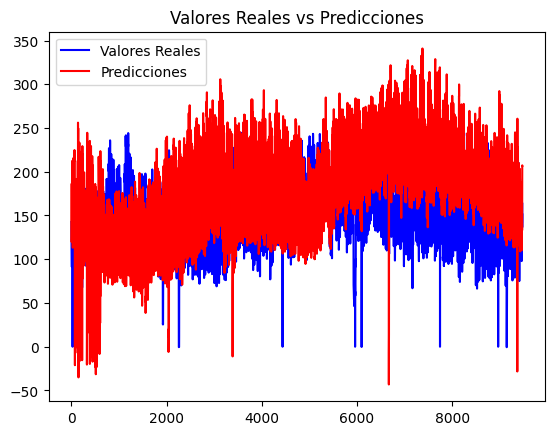

MAE: 52.542672745956686
MSE: 4231.869024082596
MAPE: 33.96%


In [5]:
# Cargar el modelo
results = ARIMAResults.load("generated/"+selected+".pkl")

# Realizar predicciones
start = 0
end = len(test_subestaicon) - 1
pred = results.predict(start=start, end=end,typ='levels')

# Graficas Predicciones vs Datos reales
yw=test_subestaicon
xw=[i for i in range(len(yw))]

plt.plot(xw, yw, color='blue', label='Valores Reales')
plt.plot(xw, pred, color='red', label='Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()

# Calcular métricas
mean = abs(yw.mean())
MAE = mean_absolute_error(test_subestaicon, pred)
MSE = mean_squared_error(test_subestaicon, pred)
MAPE = (MAE/mean*100)
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"MAPE: {round(MAPE, 2)}%")

c:\Users\ra1n\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ra1n\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\ra1n\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ra1n\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction re

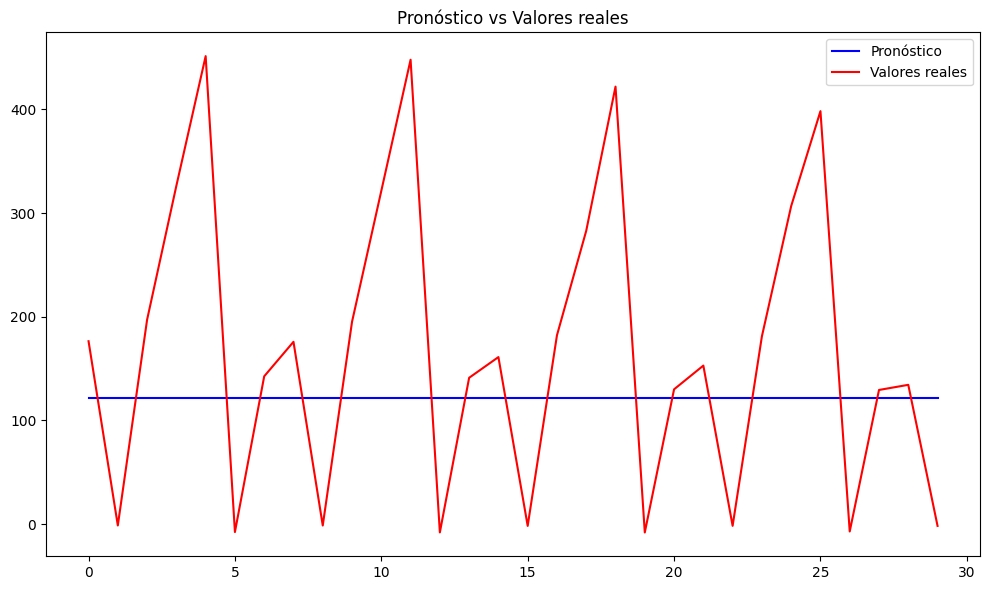

In [6]:
num_steps = 30 # Iteraciones a realizar para el forecast
ultimos_pasos = df[-30:]  # Obtener los últimos datos observados
forecasts = []

# Realizar el pronóstico para los siguientes pasos de tiempo
for _ in range(num_steps):
    forecast = results.forecast(steps=1)
    forecasts.append(forecast)  # Añadir el valor pronosticado a la lista de pronósticos

    # Actualizar los últimos pasos de tiempo con el valor pronosticado
    ultimos_pasos = np.append(ultimos_pasos[1:],forecast)

# Gráficar los valores pronosticados vs los valores reales
valores_reales = test[:num_steps] # Obtener los valores reales correspondientes al período de pronóstico
y_test = valores_reales["consumo"].to_numpy()

# Graficar los valores pronosticados vs los valores reales
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(forecasts, label='Pronóstico', color='blue')
ax.plot(y_test, label='Valores reales', color='red')
ax.set_title('Pronóstico vs Valores reales')
ax.legend()

plt.tight_layout()
plt.show()